This assignment is collaborated by **Jingting Dai** and **Hongjie Guan**. **Jingting finished A04.1 and Hongjie finished A04.2,03.3.** 

# A04.1 Community detection

In [1]:
import networkx as nx
import networkx.algorithms.community as nxcom
import itertools
import os
import matplotlib.pyplot as plt

In [2]:
def import_datasets(datasets_folder):
    d={} #empty dictionary
    for item in os.listdir(datasets_folder):
        if 'gml'in item and 'random' not in item:
            item_path = os.path.join(datasets_folder,item)
            item_name = item.split("_",1)[1].split(".")[0] 
            print("dataset named "+item_name+" imported")
            d["{}".format(item_name)] = nx.read_gml(item_path)
    print("finish importing")
    return d

In [3]:
graphs = import_datasets('data-assignment4-update')

dataset named jazz_collab imported
dataset named dolphins imported
dataset named karate imported
finish importing


In [4]:
graphs

{'jazz_collab': <networkx.classes.graph.Graph at 0x112fef820>,
 'dolphins': <networkx.classes.graph.Graph at 0x112fef160>,
 'karate': <networkx.classes.graph.Graph at 0x112fef130>}

## Task: For the given networks find the communities using (a) the greedy modularity maximization by Clauset Newman and Moore and (b) the Girvan-Newman algorithm. Assign to each community a color and draw the resulting graph.

## (a) Clauset Newman and Moore algorithm

In [5]:
comm_CNM = {}
for name, graph in graphs.items():
    cnm = sorted(nxcom.greedy_modularity_communities(graph), key=len, reverse=True)
    comm_CNM[name] = cnm

In [6]:
#add community to node attributes
#return {node: community number}
def cnm_community_nodes(graph, comm):
    d = {}
    for community,nodes in enumerate(comm):
        for node in nodes:
            graph.nodes[node]['community'] = community + 1
            d[node] = graph.nodes[node]['community']
    return d

In [7]:
#community for all 3 datasets
community_graphs = {}
for name, graph in graphs.items():
    community = cnm_community_nodes(graph, comm_CNM[name])
    community_graphs[name] = community

In [8]:
community_to_color = {
    1 : 'red',
    2 : 'green',
    3 : 'blue',
    4 : 'yellow',
}

In [9]:
#node color by community for all 3 datasets
community_node_color = {}
for name, graph in graphs.items():
    node_color = {node: community_to_color[community_id] for node, community_id in community_graphs[name].items()}
    community_node_color[name] = node_color

In [10]:
def plot_community(name, graph):
    plt.figure(figsize=(12,12))  
    plt.title("Clauset Newman and Moore: dataset " + name)
    nx.draw(graph,with_labels=True,node_color = [community_node_color[name][v] for v in graph.nodes()],node_size=80,font_size=10)
    plt.show()
    print("Number of communities: " + str(max(community_graphs[name].values())))

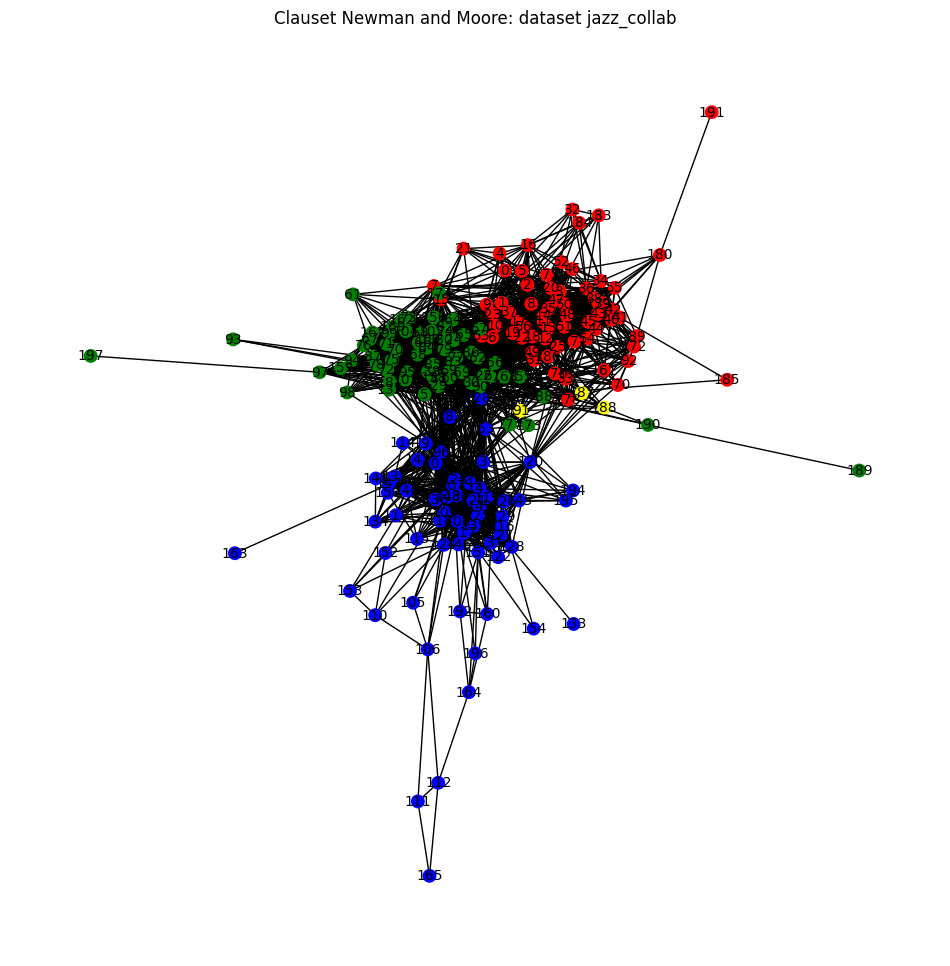

Number of communities: 4


In [11]:
plot_community('jazz_collab',graphs['jazz_collab'])

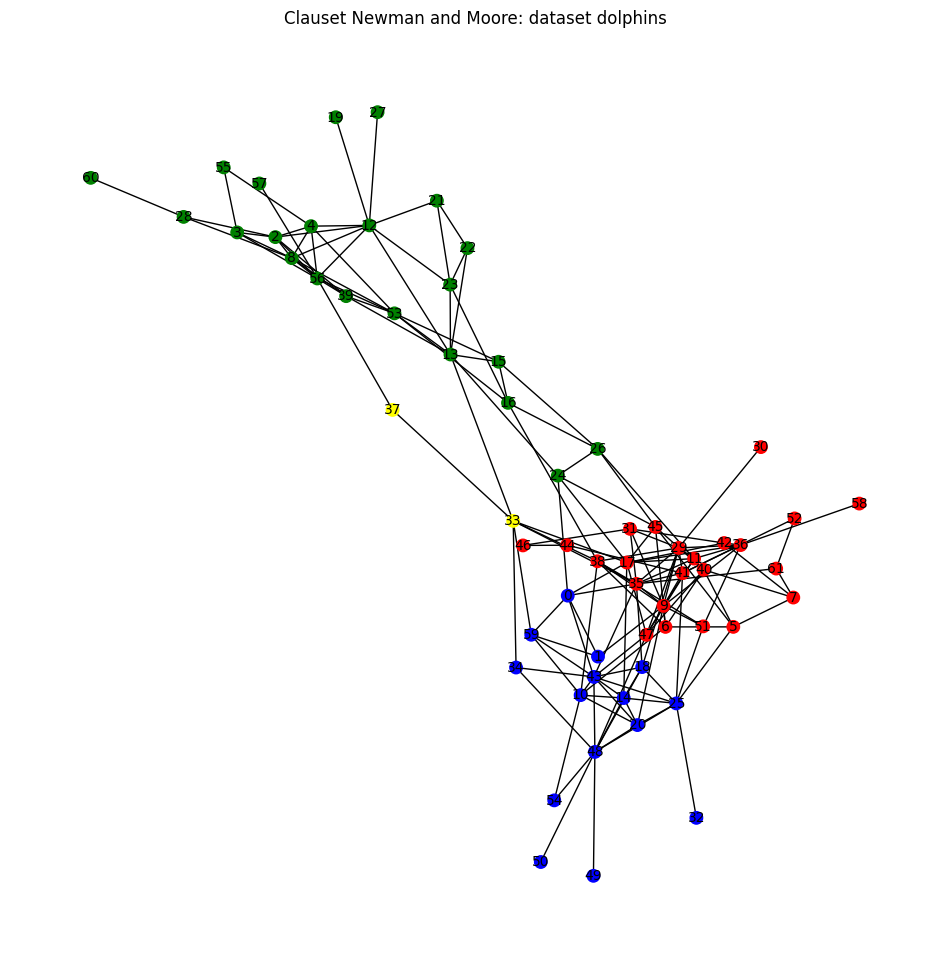

Number of communities: 4


In [12]:
plot_community('dolphins',graphs['dolphins'])

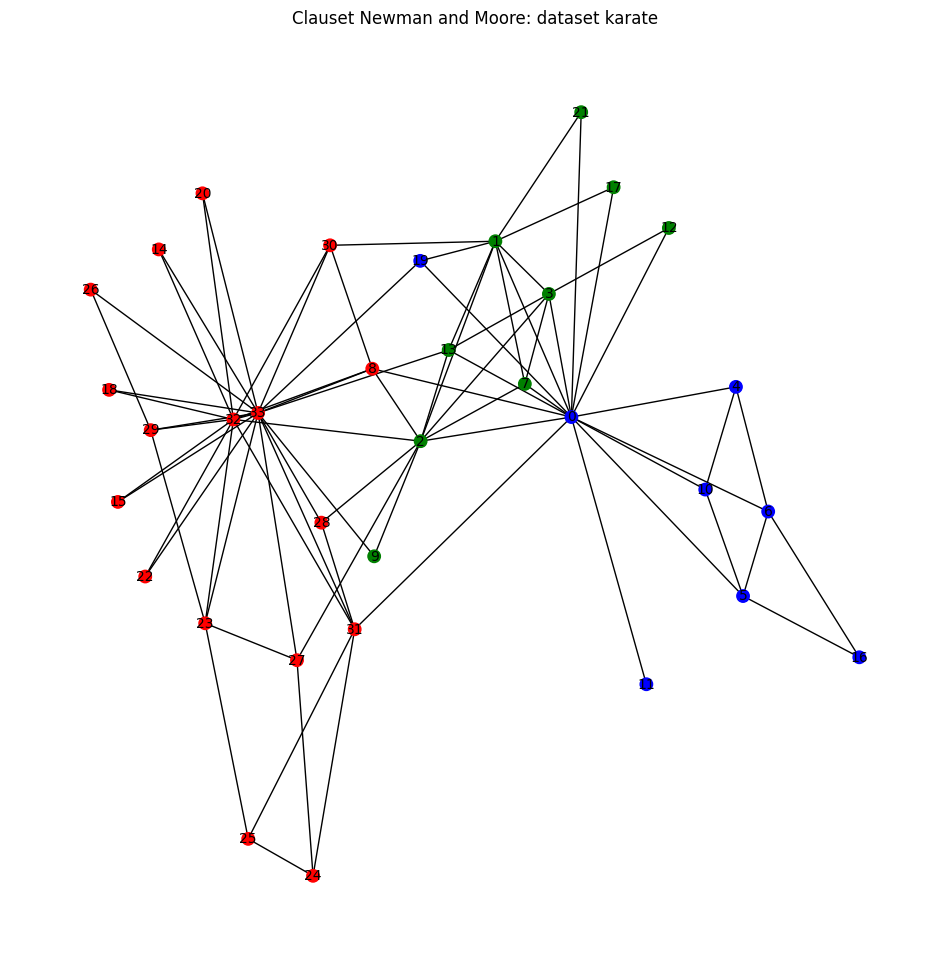

Number of communities: 3


In [13]:
plot_community('karate',graphs['karate'])

## (b) the Girvan-Newman algorithm

In [14]:
#get communities by finding max modularity in k communities
#stop getting tuples of communities once the number of communities is greater than k
#set k = 20
def gn_community(graph):
    k = 20
    communities = nxcom.girvan_newman(graph)
    limited = itertools.takewhile(lambda c: len(c) <= k, communities)
    d = {}
    for communities in limited:
        comm = tuple(sorted(c) for c in communities)
        mod = nxcom.modularity(graph,comm)
        d[mod] = comm
    max_modularity = max(d.keys())
    community_GN = d[max_modularity]
    
    return community_GN

In [15]:
#add community to node attributes
#return {node: community number}
def gn_community_nodes(graph, c):
    d = {}
    for community,nodes in enumerate(c):
        for node in nodes:
            graph.nodes[node]['community'] = community + 1
            d[node] = graph.nodes[node]['community']
    return d

In [16]:
#community for all 3 datasets
communityGN_graphs = {}
for name, graph in graphs.items():
    communityGN = gn_community_nodes(graph, gn_community(graph))
    communityGN_graphs[name] = communityGN

In [17]:
def plot_GNcommunity(name, graph):
    plt.figure(figsize=(12,12))  
    plt.title("Girvan-Newman: dataset " + name)
    nx.draw(graph,with_labels=True,node_color = [communityGN_graphs[name][v] for v in graph.nodes()],node_size=80,font_size=10)
    plt.show()
    print("Number of communities: " + str(max(communityGN_graphs[name].values())))

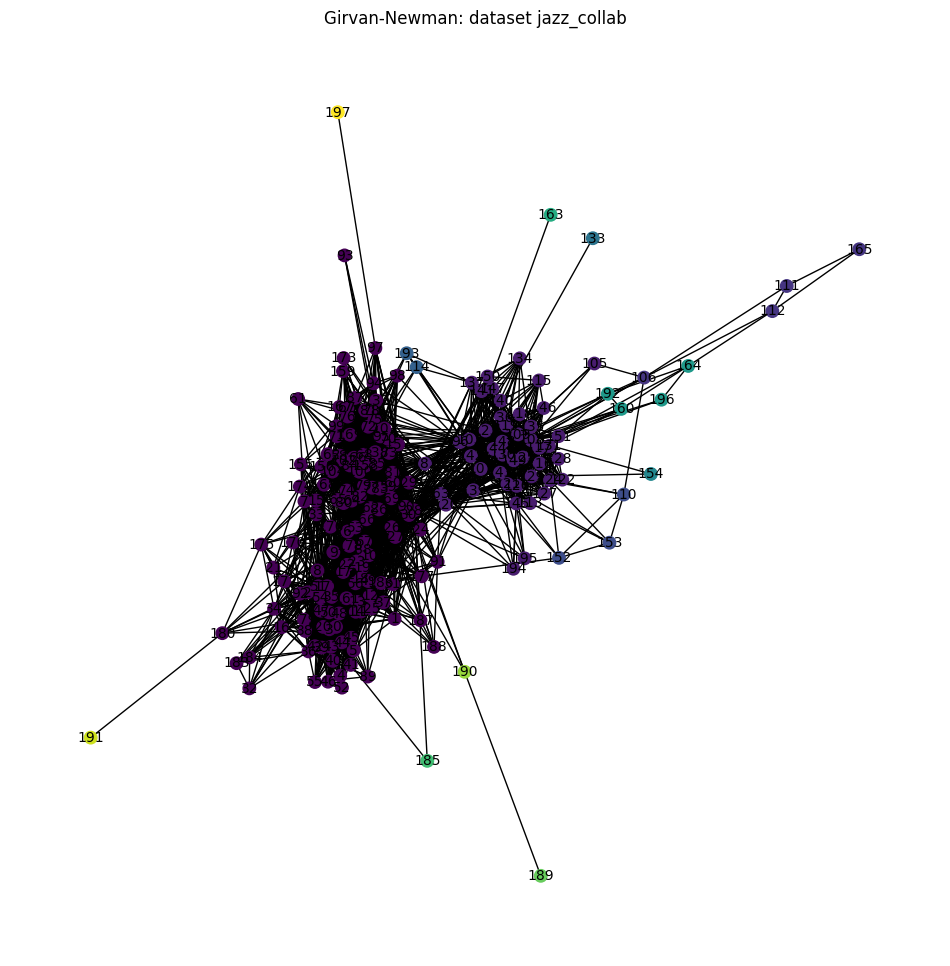

Number of communities: 14


In [18]:
plot_GNcommunity('jazz_collab',graphs['jazz_collab'])

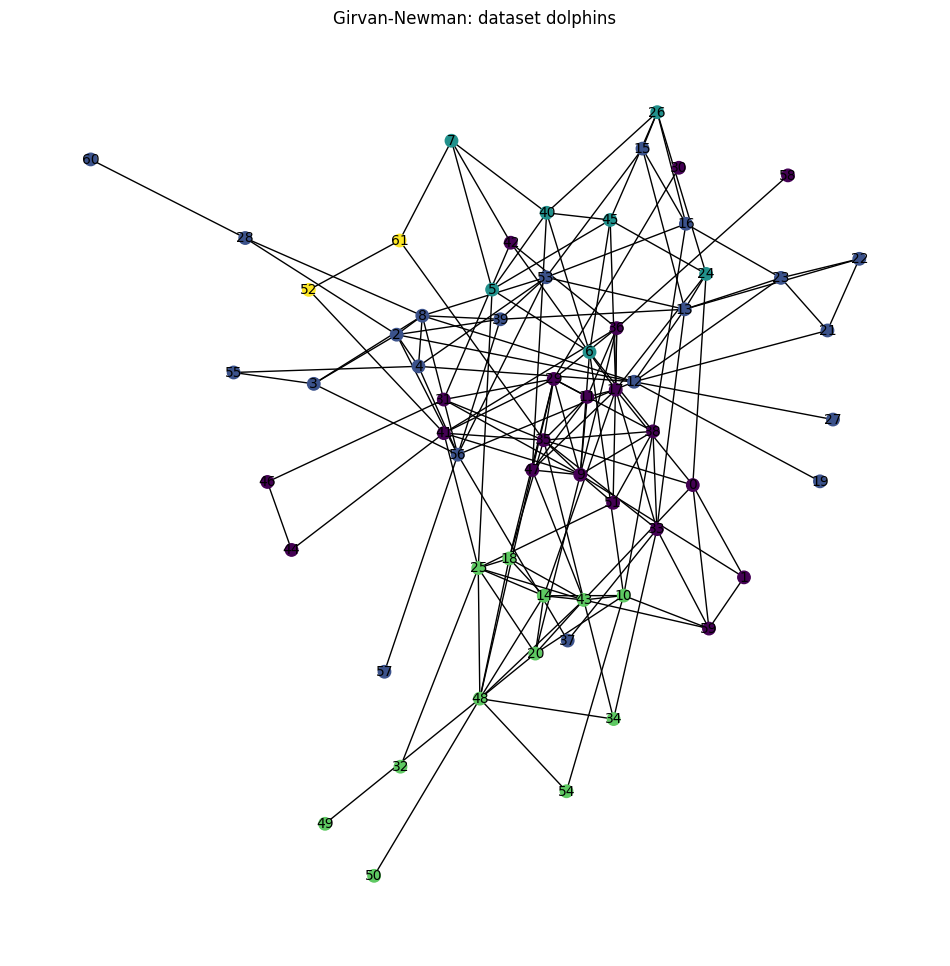

Number of communities: 5


In [19]:
plot_GNcommunity('dolphins',graphs['dolphins'])

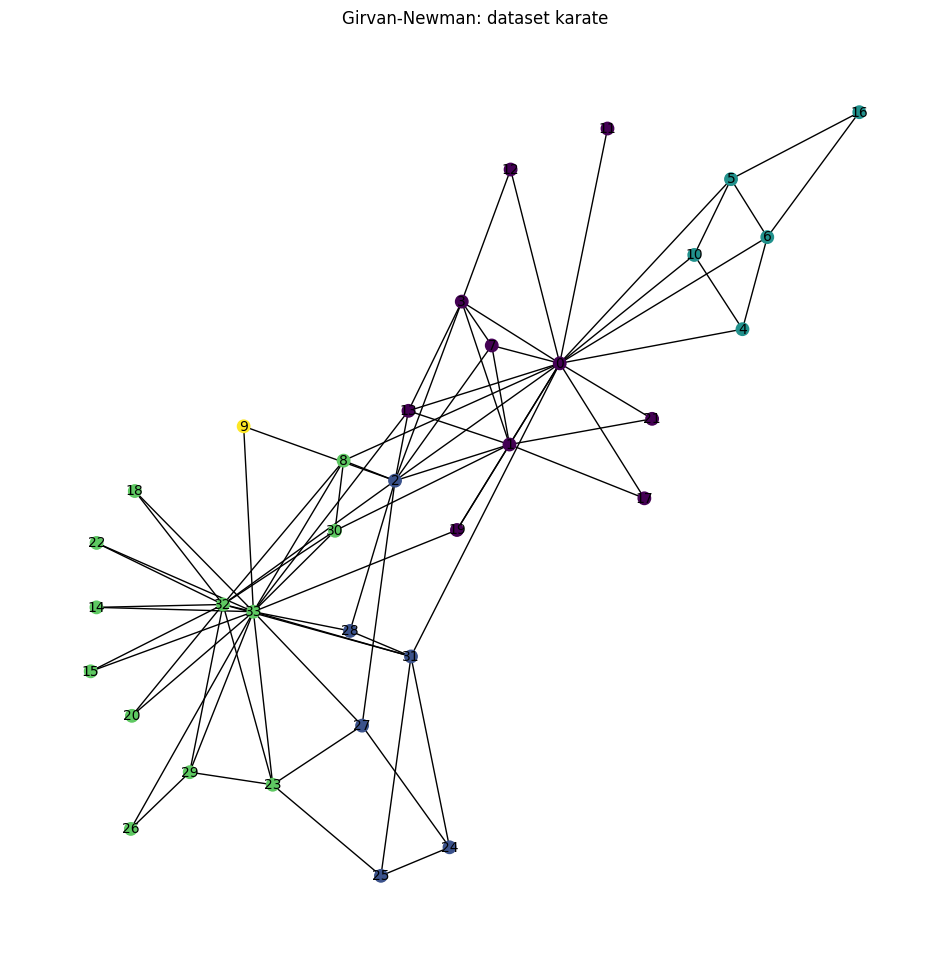

Number of communities: 5


In [20]:
plot_GNcommunity('karate',graphs['karate'])

## Task: Randomise each network and compare the number of communities obtained before and after randomisation.

In [21]:
#randomise function
#input must be imported gml dictionary
def randomise(networks):
    d={}
    for i in networks:
        d["grnd_{0}".format(i)] = nx.algorithms.smallworld.random_reference(
            networks[i],niter = 20, connectivity=False)
    return d

In [22]:
#randomised datasets dictionary
rnd_gs = randomise(graphs)

## (a) Clauset Newman and Moore algorithm

In [23]:
comm_CNM_rnd = {}
for name, graph in rnd_gs.items():
    cnm_rnd = sorted(nxcom.greedy_modularity_communities(graph), key=len, reverse=True)
    comm_CNM_rnd[name] = cnm_rnd

In [24]:
#community for all 3 randomised datasets
community_graphs_rnd = {}
for name, graph in rnd_gs.items():
    community_rnd = cnm_community_nodes(graph, comm_CNM_rnd[name])
    community_graphs_rnd[name] = community_rnd

In [25]:
for i in community_graphs:
    print(f'With Clauset Newman and Moore algorithm, the original {i} network has {max(community_graphs[i].values())} communities, \
the randomised {i} network has {max(community_graphs_rnd["grnd_" + i].values())} communities')

With Clauset Newman and Moore algorithm, the original jazz_collab network has 4 communities, the randomised jazz_collab network has 5 communities
With Clauset Newman and Moore algorithm, the original dolphins network has 4 communities, the randomised dolphins network has 6 communities
With Clauset Newman and Moore algorithm, the original karate network has 3 communities, the randomised karate network has 6 communities


## (b) the Girvan-Newman algorithm

In [26]:
#community for all 3 randomiseddatasets
communityGN_graphs_rnd = {}
for name, graph in rnd_gs.items():
    communityGN_rnd = gn_community_nodes(graph, gn_community(graph))
    communityGN_graphs_rnd[name] = communityGN_rnd

In [27]:
for i in communityGN_graphs:
    print(f'With Girvan-Newman algorithm, the original {i} network has {max(communityGN_graphs[i].values())} communities, \
the randomised {i} network has {max(communityGN_graphs_rnd["grnd_" + i].values())} communities')

With Girvan-Newman algorithm, the original jazz_collab network has 14 communities, the randomised jazz_collab network has 2 communities
With Girvan-Newman algorithm, the original dolphins network has 5 communities, the randomised dolphins network has 15 communities
With Girvan-Newman algorithm, the original karate network has 5 communities, the randomised karate network has 17 communities


# A04.2 Erdos-Renyi random networks
Task: Generate three Erdos-Renyi networks with 𝑁 = 500 nodes and average degree (a) ⟨𝑘⟩ = 0.3, (b) ⟨𝑘⟩ = 1 and (c) ⟨𝑘⟩ = 2.5. Visualize these networks.\
Task: Generate ER graphs with 𝑁 = 200 nodes for different edge creation probabilities 𝑝 ∈ [0, 1] and:

# A04.3 Small-world with high clustering
Task: Generate many WS small-world networks with 𝑁 = 150 nodes and fixed number of neighbors for each node 2𝜅 = 12. As a function of the rewiring probability 𝑝, using both linear and logarithmic scale for the 𝑝-axis: